<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 13: Deep Learning

### CS6364/CS4364 Machine Learning

__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

# Part 1: What is Deep Learning?

Deep learning is a subfield of machine learning closely tied to neural networks.

Let's find out what deep learning is, and then we will see some deep learning algorithms.

# Review: Neural Networks

A (fully connected) neural network is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$
Each layer $l$ is the application of $p_l$ neurons to the input of the layer.

The notation $f \circ g(x)$ denotes the composition $f(g(x))$ of functions

We can visualize this graphically as follows.

<img src="img/nns/layers-L.png" width=100%>

# What is Deep Learning?

Deep learning is a modern evolution of the field of artificial neural networks that is defined by three key features:
* Neural networks with a very large depth (even more than 100's of layers)
* Large unstructured datasets, especially images, text, and audio
* The use of modern computational resources, like GPUs


# Expressivity of Deep Models

Deep neural networks are very powerful models in part because they can represent complex mappings between $x$ and $y$.
* Shallow neural networks can represent any function, but need very large hidden layers.
* Deep networks can represent very complex $\mathcal{X} \to \mathcal{Y}$ mappings with fewer parameters.

In practice, deep neural networks can learn very complex mappings such as $\text{image} \to \text{text description}$ that other algorithms cannot. 

<img src="img/image_captioning.jpeg">

# Representation Learning

How does a deep neural network use its representational power?
* The sequential layers can learn to represent data at an increasing level of abstraction
* This can also be interpreted as learning: each layer maps input to a more abstract feature space that is *learned* from data.

This is an example of representations that a deep neural network learns from data.
<center>
<img src="img/levels.png">
</center>    

# Scaling to Large Datasets

Deep neural nets also scale to very large datasets (figure by Andrew Ng).

<center>
<img width="40%" src="img/dl_data_curve.png">
</center>    

Classical algorithms like linear regression saturate after a certain dataset size. Deep learning models keep improving as we add more data.

# Computational Scalability

Deep learning datasets benefit from large datasets because they can easily use specialzied computational hardware.
* Neural networks mostly implement linear algebra, and benefit from hardware acceleration.
* Today, they are trained on graphical processing units (GPUs), or even more specialzied hardware.

# Connections to Neuroscience

As artificial neurons are designed to mimic the biological ones, deep neural networks have strong connections with biological neural systems. 

One of the most interesting ones is the visual processing network in brains.

There is ample evidence that deep neural networks perform computation very similar to that of the visual cortex ([Kravitz el al](https://plos.figshare.com/articles/_Hierarchical_representations_along_the_ventral_visual_pathway_/811315).).
<center>
<img width="60%" src="img/hierarchy.jpg">
</center>    

# How various models of neurons are biologically plausible?


<center>
<img width="60%" src="img/bio_plausibility.png">
</center>   

# Successes of Deep Learning

Deep learning has been a major breakthrough in machine learning in the last decade.
* It has dramatically improved common technologies like speech recognition or machine translation.
* It has enabled new results that have captured the popular imagination.

These images were generated by a deep generative model from a short text prompt:
<center>
<img src="img/midjourney-example.png">
</center>

e.g., "*kneeling cat knight, portrait, finely detailed armor, intricate design, silver, silk, cinematic lighting, 4k, --ar 9:16  --beta --upbeta*"

<center>
<img src="img/stable-diffusion-example.png">
</center>

"*A digital illustration of a steampunk flying machine in the sky with cogs and mechanisms, 4k, detailed, trending in artstation, fantasy vivid colors*"

# Pros and Cons of Deep Neural Networks

### Pros:
1. **High Accuracy and Performance**: DNNs often achieve superior performance and accuracy in tasks like image and speech recognition, surpassing traditional ML models.
2. **Feature Extraction**: DNNs are capable of automatic feature extraction, meaning they can identify relevant features from raw data without manual intervention.
3. **Flexibility and Adaptability**: They are adaptable to a wide range of applications, from natural language processing to complex game strategies.
4. **Continuous Improvement**: With more data and training, DNNs can continually improve their performance over time.



# Pros and Cons of Deep Neural Networks


### Cons:
1. **Resource Intensive**: They require significant computational power and memory, making them less accessible for smaller organizations or individual developers.
2. **Overfitting Risks**: Without proper regularization, DNNs are prone to overfitting, especially when trained on small datasets.
3. **Transparency and Interpretability**: DNNs are often viewed as "black boxes," making it challenging to understand how decisions or predictions are made.
4. **Dependence on Quality Data**: The performance of DNNs heavily relies on the quality and quantity of the training data. Poor quality data can lead to biased or inaccurate models.

* OpenAI GPT-2/3/4 is a language model that uses deep learning to generate text, as if they were written by a human.

Try it out!
https://transformer.huggingface.co/doc/gpt2-large

GPT-3 is more powerful and able to generate structured text such as HTML/CSS, tables, Python programs, food recipes and much more.

https://github.com/elyase/awesome-gpt3

Open source language models are catching up quickly.

<center>
<img src="img/hf_leaderboard.png">
</center>

https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard

# Challenges of Deep Learning

Deep learning is powerful, but it can be challenging to apply it to real-world problems.

* In very deep networks, gradients can become very small (vanishing) or very large (exploding) as they propagate back through the layers during training.


* Vanishing gradients lead to slow or stagnant learning in early layers, while exploding gradients can cause learning to diverge.


* Deep neural networks are prone to overfitting.

  We need proper regularization, data augmentation, and close monitoring of the training process.


* Requires a massive amount of data

  Training from scratch with limited data is difficult. Consider transfer learning from pre-trained models.



 * Possible solutions will be to use normalization (BatchNorm and variants), skip connections (ResNet), gradient clipping, modified nonlinear activation functions, etc.

Deep Learning Playground. Let's play:

https://playground.tensorflow.org/

Next we are going to look into a particular type of deep neural networks that is widely used for static data such as images: Convolutional Neural Networks (CNN).

But first we need to review the foundational operations of CNNs: Convolutions and Pooling.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 2: Convolutions and Pooling

These basic operations are the building blocks of modern convolutional neural networks. 

# Review: What is Deep Learning?

In a nutshell, deep learning is a modern evolution of the field of artificial neural networks that emphasizes:
* Very deep neural networks
* Large unstructured datasets, especially images, text, and audio
* Modern computational resources, like GPUs

# Convolutional Neural Networks

Our goal will be to introduce a modern and very powerful deep neural network architecture: the convolutional neural network (CNN).
* CNNs are state-of-the-art across image processing tasks
* They are loosely motivated by the structure of the visual cortex
* They are based on two operations: convolution and pooling

# Motivation: Edge Detection

Consider the problem of detecting edges in an image.
<center><img width=100% src="img/edge_detection.png"></center>
This can be useful for detecting or classifying objects in a scene.

# Convolution: Intution

2D: Here, we convolve a 3x3 *filter* with a 5x5 *signal* to obtain an *activation map*.
<center><img width=38% src="img/convolution-2d-example.gif"></center>

1D: Here, we convolve a filter of size 3 on an input of size 13.
<center><img width=70% src="img/1d_conv_animated.gif"></center>    
</center>  
An activation map contains dot products between the filter and the signal.

# Convolution: Definition

Let $f \in \mathbb{R}^p$ and $x \in \mathbb{R}^d$ be two vectors, called the *filter* (or *kernel*) and the *signal* respectively. Typically, $p < d$.

In deep learning, a convolution $(f * x ) \in \mathbb{R}^d$ is typically defined as
\begin{align}
(f * x ) [i] &\triangleq \underbrace{\sum_{j=1}^{p} f[j] x[i+j]}_\text{dot product of $f$ with part of $g$}
\end{align}
where $x[j] = 0$ when $j \leq 0$ or $j>d$.

* We may think of the convolution $$\sum_{j=1}^{p} f[j] x[i+j]$$ as a "local" dot product of `f` with `x[i:i+p]` (the subsequence of $x$ that starts at position $i$).

* $(f * x ) [i]$ is large when $f$ is similar to $x$ at $i$ and small otherwise. It measures the extent to which $f$ is "found" in $x$ at $i$.

This is best understood via a picture (credit: [Brandon Rohrer](https://e2eml.school/convolution_one_d.html))
<center><img width=70% src="img/1d_conv_animated.gif"></center>

Notice how the output has large values at locations where the dot product between the kernel and the signal is large.

This is best understood via a picture:
<center><img width=100% src="img/1d_conv.jpeg"></center>

The green sequence `[1,0,-1]` is the filter. The signal $g$ is in gray, and the outputs of the convolution 
$$(f * g)[p] = 1 \cdot g_p + 0 \cdot g_{p+1} -1 \cdot g_{p+2}$$ are in yellow.

On a small technical note, what we have defined is called the cross-correlation in mathematics.

The convolution is technically defined as $\sum_{j=1}^{p} f[j] x[i-j]$, but in deep learning both formulas effectively give the same results and the cross-correlation is used in practice (and is called "convolution").

We can implement a convolution in Python as follows.

In [1]:
# A naive (*slow*) implementation of convolution with loops, don't use this in practice!
def conv_naive(f, x):
    P = len(f)
    D = len(x)
    result = [0]*D
    for d in range(D):
        for p in range(P):
            if d-p>=0 and d-p<D:
                result[d] += f[p]*x[d-p]
    return result[P-1:] #only return valid results
                
# numpy also provides convolution function np.convolve(f,g,'valid')

# Example: Edge Detection

To gain more intuition about convolution, let's look at another example in 1D.

We start by defining a filter and a signal as numpy arrays.

In [2]:
import numpy as np

# create filter
f = np.array([-1.,1.])

# create signal
x = np.ones(30)
x[5:8] = 0
x[15:18] = 0

# create convolution
conv_result = conv_naive(f,x)

Here, the signal has "jumps" or "edges" between 0 and 1 at a few locations.

The filter equals $\pm1$ at these edges, and zero everywhere else. If $g$ was an audio signal, then $f$ would detect boundaries between silence.

/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/1382171148.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax1.stem(range(len(f)), f, use_line_collection=True)
/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/1382171148.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(range(len(x)), x, use_line_collection=True)
/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/1382171148.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two 

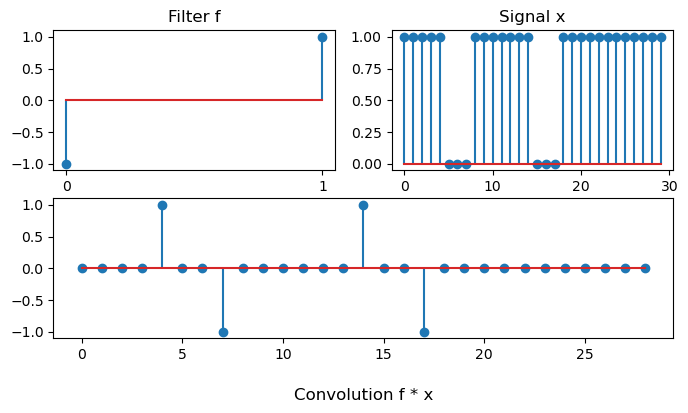

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

ax1 = plt.subplot(221)
ax1.stem(range(len(f)), f, use_line_collection=True)
ax1.set_title('Filter f')
ax1.set_xticks([0,1])
ax2 = plt.subplot(222)
ax2.stem(range(len(x)), x, use_line_collection=True)
ax2.set_title('Signal x')
ax3 = plt.subplot(212)
ax3.stem(range(len(conv_result)), conv_result, use_line_collection=True)
ax3.set_title('Convolution f * x', y=-0.5)

plt.show()

# Example: Smoothing

Another application of convolutions is to smooth the signal $g$.

We again define a filter and a signal as numpy arrays.

In [4]:
# create signal
x = np.ones(30)
x[5:8] = 0
x[15:18] = 0

# create filter
f = np.sin(np.linspace(0.1,np.pi,10))
f /= f.sum()

# create convolution
conv_result = conv_naive(f,x)

The filter $f$ is a "mini bell curve". When applied to the same signal, it smoothes-out the "kinks".

/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/598874488.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax1.stem(range(len(f)), f, use_line_collection=True)
/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/598874488.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(range(len(x)), x, use_line_collection=True)
/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/598874488.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two mino

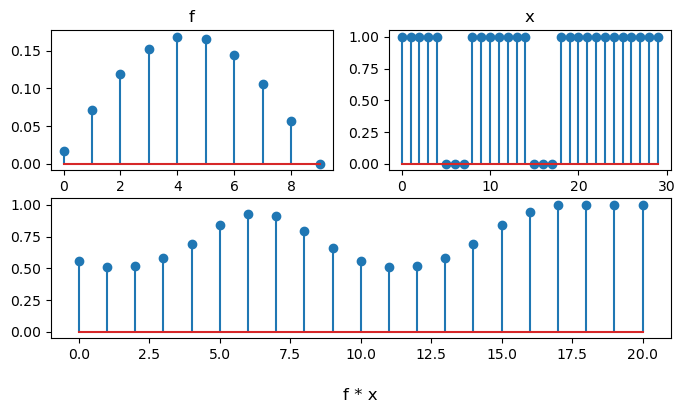

In [5]:
ax1 = plt.subplot(221)
ax1.stem(range(len(f)), f, use_line_collection=True)
ax1.set_title('f')
ax2 = plt.subplot(222)
ax2.stem(range(len(x)), x, use_line_collection=True)
ax2.set_title('x')
ax3 = plt.subplot(212)
ax3.stem(range(len(conv_result)), conv_result, use_line_collection=True)
ax3.set_title('f * x', y=-0.5)

plt.show()

# What Are Convolutions Doing?

The convolution applies the filter $f$ onto the signal $x$. 
* This can change the behavior of $x$ (e.g., smoothing it out).
* Or it can extract useful characteristics from $x$ (e.g., edge detection, or when does the signal changes drastically).

We can use convolutions in machine learning models to *learn* the filters.

# Convolutions in 2D

Convolutions can be extended to 2D by expanding dimensions of $f$ and $x$. 
<center>
<img src="img/2dconv.gif">
</center>    
In this example, $f$ is a 3x3 array (gray area). $x$ is a 5x5 array (blue area). The result of the convolution is the top green area.

In the context of neural networks, $f$ are learnable weights, $x$ are inputs from previous layers. 
* The signal $x$ can be an image.
* The filter $f$ can be a "feature" of the image, like an edge or a more complex object.

The results of applying the convolution are fed to the next layer.

# Example: Edge Detection in 2D

Let's revisit our edge detection example, but this time the signal $g$ will be a 2D image.

We will use two filters, each of which is defined below. We will also load an image as the signal $g$.

/var/folders/y5/w7dfgsr11dl0jh1hzql_msrh0000gp/T/ipykernel_71049/3540185941.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  img = misc.ascent()


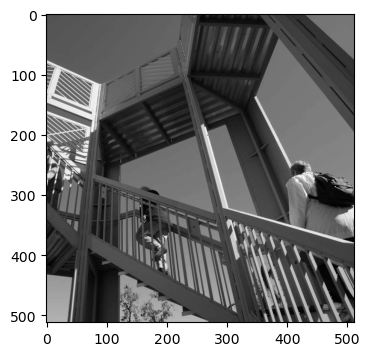

In [6]:
from scipy import misc

# define the filters
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# load and visualize the "signal"
img = misc.ascent()
plt.imshow(img, cmap='gray')

We can now convolve and visualize the filters with the image.

The result is an activation map with high activation around horizontal and vertical edges -- parts of the image where it changes from light to dark.

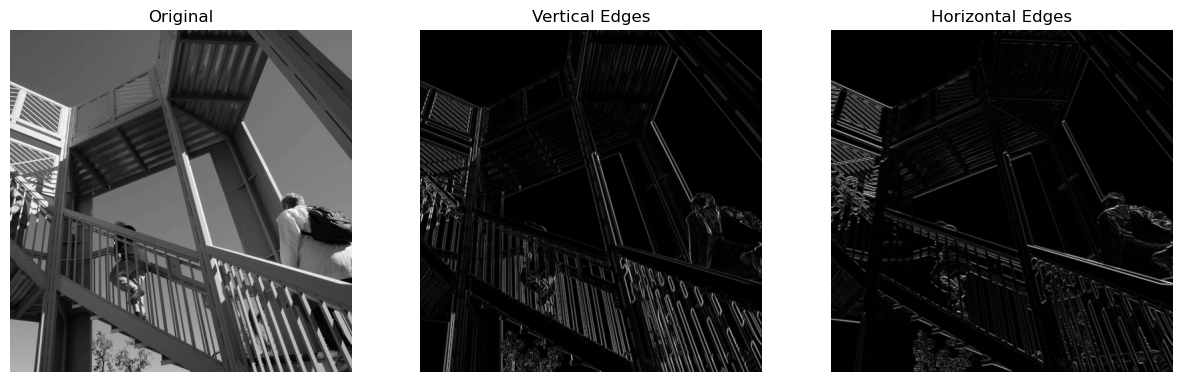

In [7]:
from scipy import signal

# create the convolution with each filter
grad_x = signal.convolve2d(img, sobel_x, boundary='symm', mode='same')
grad_y = signal.convolve2d(img, sobel_y, boundary='symm', mode='same')

# visualize the convolution
fig, (ax_orig, ax_x, ax_y) = plt.subplots(1, 3, figsize=(15, 15))
ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_x.imshow(np.absolute(grad_x), cmap='gray')
ax_x.set_title('Vertical Edges')
ax_x.set_axis_off()
ax_y.imshow(np.absolute(grad_y), cmap='gray')
ax_y.set_title('Horizontal Edges')
ax_y.set_axis_off()

# Review: Neural Network Layers

A neural network layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ neurons ih parallel to an input $x$.
$$f(x) = \sigma(W\cdot x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix},
$$
where each $w_k$ is the vector of weights for the $k$-th neuron and $W_{kj} = (w_k)_j$. We refer to $p$ as the *size* of the layer.

# Convolutional Layers

A convolution layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ convolutions in parallel to an input $x$.
$$f(x) = \text{conv}(W, x) = \begin{bmatrix}
\text{conv}(w_1, x) \\
\text{conv}(w_2, x) \\
\vdots \\
\text{conv}(w_p, x) \\
\end{bmatrix},
$$
where each $w_k$ is the weights for the $k$-th convolution filter (think $f$ in our 1D example). 

# Understanding 2D Convolutional Layers

A convolutional layer outputs an activation map for each of its filters.
<center>
<img src="img/conv_blocks.gif" width="1000">
</center>    
The activation maps are typically stacked along the depth dimension.

Inputs to convolutional 2d layer have a "depth" dimension (e.g., color channels in an image or stacked activation maps; image by [Google](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist#0)).
<center>
<img src="img/conv_rgb.gif" width="700">
</center>    
Filters then also have "depth" and we do a dot product across all channels.

In this example, the first convolution filter in the conv layer produces the first activation map.
<center>
<img src="img/cnn-filters1.png" width="800">
</center>    

A different filter produces a different activation map.
<center>
<img src="img/cnn-filters2.png" width="800">
</center>    

Each filter produces its own activation map.
<center>
<img src="img/cnn-filters4.png" width="800">
</center>   

All activation maps in the same conv layer are concatenated together to form the final multi-channel output: 
<center>
<img src="img/cnn-filters-all.png" width="800">
</center>    

Here is another example (image by [Martin Arenillas](https://m-alcu.github.io/blog/2018/01/13/neural-layers/)):
<center>
<img src="img/conv_rgb_tensor.gif" width="500">
</center>    

A convolutional [layer](https://iq.opengenus.org/terms-used-in-neural-networks/) can be thought of transforming an input 2d tensor (size `w1 x h1 x d1`) into another one (size `w2 x h2 x d2`).
<center>
<img src="img/conv_tensor_to_tensor.gif" width="800">
</center>    

# Attributes of Convolutional Layers

The most important attributes of a convolutional layer are:
* **# input channels**: the number of feature maps from input.
* **# output channels**: the number of feature maps for output, this is also the number of convolutional filters in this layer.
* **kernel_size**: size of the convolution filters.

# When to Use Convolutions?

Convolutions work best on inputs containing "attributes" that are interesting, but whose location in the input is not important.

Images are by nature good examples of this assumption. Convolution layers can learn similar functions as fully connected layers, but with much smaller parameters.

# Pooling

Pooling is an operation often added after a convolution layer. It is [applied](https://mlnotebook.github.io/post/CNN1/) to each activation map separately and reduces the spatial size of its input. 
<center>
<img src="img/conv_pooling.gif" width="600">
</center>

**Max Pooling**: for each region in the input, return the max value. This is the most common type.
<center>
<img src="img/pooling.jpg" width="700">
</center>

**Average Pooling**: for each region in the input, return the average value. 


# Pooling Layers

A pooling layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies pooling operations to an input $x$.
$$f(x) = \text{pooling}(x)
$$
where $pooling$ is a pre-defined operation applied over the input $x$.

Pooling layer does not have learnable weights.


# Purpose of Pooling

* Simplifies the pooling window: the exact location of the relevant feature is not critical. This improves feature detection.

* When used together with convolutions, pooling reduces spatial size of feature maps to capture more abstract representations.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 3: Convolutional Neural Networks

Convolutional neural networks use convolutional layers to process signals such as images, audio, and even text.


# Review: Convolution

Convolutions apply a filter $f$ (gray) over a signal $g$ (blue). The output is an activation map (green).

<img src="img/2dconv.gif">
<!-- <sub><sup>https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d</sup></sub> -->


# Review: Pooling

Pooling is a common operation to be added after a convolution layer. It is applied to each activation map separately and reduces the spatial size of its input. 

<center>
<img src="img/pooling.jpg" width="700">
</center>

# Convolutional Neural Networks 

A convolutional neural network (CNN) is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers that contain convolutions:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$

The final $f_L$ is often a fully connected output later of size one.

Typically, CNNs are made of consecutive convolution + activation + pooling layers that form into blocks.


<img src="img/cnn.png" width="400">


Next we are going to see a few famous examples.


# LeNet for MNIST Digits Recognition

LeNet successfully used CNNs for digit recognition [LeCun, Bottou, Bengio, Haffner 1998].
<img src="img/lenet.png">


* LeNet contains multiple convolutional and max-pooling (called subsampling in the original paper) layers and a fully connected MLP in the end.
* Given an image of a hand-written digit, LeNet predicts it to be one of the 10 classes (0-9).
* This work inspired many subsequent CNN architectures.

# AlexNet and ImageNet

ImageNet classification with deep convolutional neural networks [Krizhevsky, Sutskever, Hinton 2012]

<img src="img/alexnet.png">

* AlexNet contains multiple convolutional layers followed by max pooling. The prediction is 1000 dimentional because that is the number of classes in the ImageNet classification task.

* Note that in the original implementation the image is separated into two parts that are in two different GPUs due to hardware limits.

<!-- * AlexNet is one of the first CNN implementations that provides highly-optimized GPU implementation of 2D convolution and other operations. -->

Starting from AlexNet, the performance of image classification on ImageNet has entered a new era:

<img src="img/imagenet.png">
<sub><sup>http://sqlml.azurewebsites.net/2017/09/12/convolutional-neural-network/</sup></sub>

Convolutional neural networks with deeper layers (and other tricks) have already exceeded **human performance** on such tasks.

# Algorithm: Convolutional Neural Network

* __Type__: Supervised learning (regression and classification).
* __Model family__: Compositions of convolutional, pooling and other types of layers.
* __Objective function__: Any differentiable objective.
* __Optimizer__: Gradient descent.

# CNNs and Feature Learning

Before neural networks, computer vision algorithms used hand-crafted features to extract information from raw image inputs.

Designing such features is hard and most importantly they might not be optimal for a particular task. 

One set of features that used to be popular was the Scale-Invariant Feature Transform (SIFT).

<center>
<img src="img/sift.jpg">
</center>    
<sub><sup>https://www.vlfeat.org/overview/sift.html</sup></sub>

<center>
<img src="img/sift_citation.png">
</center>  

Another common set of features was the the Histogram of Oriented Gradients (HOG).
<center>
<img src="img/hog.jpg">
</center>
<sub><sup>https://sarthakahuja.org/public/docs/report_ped_detection.pdf</sup></sub>

By using CNNs, we now can extract features from input images at different level of abstraction, without the need of designing hand-craft features.

# Visualizing CNN Internals

CNNs can be seen as extracting features at low-, mid-, and high-levels of abstraction that are relevant to corresponding visual concepts.

Below, we reproduce feature visualization from the paper Visualizing and Understanding Convolutional Networks [Zeiler, Fergus 2013].

For a convolutional network with 

$$ \text{Input} \rightarrow \text{Conv Layer1} \rightarrow \text{Conv Layer2} \rightarrow \cdots \rightarrow \text{Conv Layer5} \rightarrow  \cdots \rightarrow \text{Output,}$$

we can visualize what each layer is doing by finding the image patch with highest activation responses.

Layer 1 focuses on colored edges and blobs.
<center>
<img src="img/layer1.png">
</center>    

Layers 2-3 focus on object parts, such as the wheels of a car, or the beak of a bird.

<img src="img/layer2.png">

<img src="img/layer3.png">

Layers 4-5 focus on object parts and even entire objects.

<img src="img/layer45.png">

# Pros and Cons of CNNs:

CNNs are powerful tools because they encode visual information efficiently.
* CNNs are now used as universal visual feature extractors. It is common to use ImageNet pretrained CNNs. 
* They serve as building blocks in ML pipelines and can work with other types of networks such as a recurrent network for complex tasks.

Their main drawbacks are computational and data requirements.